<a href="https://colab.research.google.com/github/Jeen-Freecs/DS_Pet_Projects/blob/main/Numerical%20Algorithms/ODEs_and_Runge_Kutta_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projects: ODEs and Runge-Kutta method

Consider ordinary differential equation

$$ \frac{d^2\!y}{dt^2}+4y=0$$

with initial conditions $y(0)=1$ and $y'(0)=0$. Obtain the numerical soluton of this equation in the interval from $t=0$ to $t=4$ with $0.1\%$ accuracy using

**Abstract**


The main aim of this research is to obtain the numerical solution of the 2nd order ODE,which is shown above, by using the Runge Kutta methods(Mid-Point, 3rd-order method,4rd-order method, 5rd-order method).We will approximate the numerical solution of this ODE by each method and then evaluate the performance of each method.We have conducted the analytical soultion of this ODE and we will use it for obtaining the RMSE.Overall, it was analysed that the higher - order Runge-Kutta methods approximates at better accuracy for the same computational effort.(see the graph below)

**Introduction**

We was given the 2nd order ODE with the inital conditions and specific period [0,4].However Runge - Kutta method is specializng only on 1st order differential equation, so we have decided to use System of equations method, where we will perceive out 2nd order ODE as two 1st-order ODEs.Generally, the main idea behind a family of Runge-Kutta methods is related to make approximations of next point within the given period with the help of slope. However as the order of the method increases, the general formula becomes more complex.In other words, the number of functions that should be evaluated increases.One of the main tasks that we will research is the value of the stepsize $\Delta t$ that yields the required accuracy 0.1%. This stepsize should be found for each RK method.Then, we will plot the graph of performance, where each method's trend will be visualized.


**Methods**

For finding the answer for tasks(a-b-c-d), I made an algorithm for each method that will approximate the numerical solution.I have used the general formulas of each RK method and interpreted them as the system of equations.The data for t values was generated through np.arange fucntion.The data for $y$ and $dy/dt$ or $z$ were generated through the algorithm which can be seen below.The general idea of this algorithm is to accumulate the y value by iterating throug the given period with the given stepsize.The final result value of y is a numerical solution to a ODE.In order to find the stepsize $\Delta t$ that yields the 0.1% accuracy, I have implemented the while loop which will break when the required accuracy is achieved by calculating the RMSE.For finding the RMSE, we were also required to find the analytical solution of the given ODE:

$$y(x) = cos(2x)$$

The data point for the analytical solution was generated through list comprehension, while for RK method solution the data points were simply appended to list with each iteration.At the end of each method, you can see the RMSE and stepsize at which the accuracy was achieved.Mostly in this research problem the grpahs was plotted to conduct an analysis for each methods.I have used the plots for each method to see how the approximated solution alligned with the analytical one and this was done to make sure that our algorithm works.




**Main body**


In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math as math

As it is the 2nd order ordinary differential equation(ODE) we will use the system of equations method and will separate the 2nd-order ODE to  two 1st-order ODEs:

$$ \frac{d^2\!y}{dt^2}+4y=0$$
$$ \frac{d^2\!y}{dt^2}= -4y$$
$$1) \frac{dy}{dt} = z$$
$$2)f(y) = \frac{dz}{dt} = -4y$$





In [ ]:
def f(y):
  return -4*y

a = 0.0
b = 4.0
N = 10

(**a**) the midpoint method (given by Eq. 25.37 of the book). Find the stepsize $\Delta t$ that yields the required accuracy. 

Root Mean Square Error: 0.0009992484095079335
The stepsize (Δt) that yields the required accuracy:0.021164021164021163


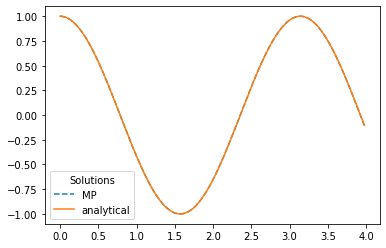

In [ ]:
# y' = z
# z' = -4y

a = 0.0
b = 4.0
N = 10

while True:
  h = (b-a)/N
  t_data = np.arange(a,b,h)
  MP_y_data = []
  MP_z_data = []
  y_true = [math.cos(2*i) for i in t_data]
  y = 1.0
  z = 0.0

  for x in t_data:
    MP_y_data.append(y)
    MP_z_data.append(z)

    p1 = h*z
    k1 = h*f(y)  #(x, v, t)

    p2 = h*(z + 0.5*k1)
    k2 = h*f(y+0.5*p1)

    y += p2
    z += k2

  MSE = np.square(np.subtract(MP_y_data,y_true)).mean() 
  RMSE = math.sqrt(MSE)

  if RMSE<0.001:
    print(f"Root Mean Square Error: {RMSE}")
    print(f"The stepsize (Δt) that yields the required accuracy:{h}")
    break
  else:
    N += 0.5

plt.plot(t_data, MP_y_data, '--')
plt.plot(t_data, y_true, '-')
plt.legend(['MP','analytical'],title = 'Solutions', loc='best')
plt.show()

The stepsize (Δt) that yields the required accuracy:0.021164021164021163

(**b**) the 3rd-order Runge-Kutta method (given by Eq. 25.39 in the book). Find the stepsize $\Delta t$ that yields the required accuracy.

Root Mean Square Error: 0.0009992652102172816
The stepsize (Δt) that yields the required accuracy:0.0975609756097561


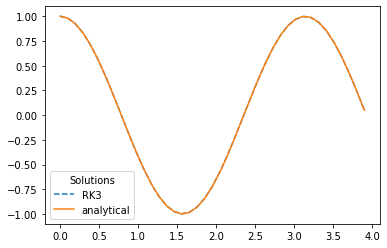

In [ ]:
# y' = z
# z' = -4y

a = 0.0
b = 4.0
N = 10

while True:
  h = (b-a)/N
  t_data = np.arange(a,b,h)
  RK3_y_data = []
  RK3_z_data = []
  y_true = [math.cos(2*i) for i in t_data]
  y = 1.0
  z = 0.0

  for x in t_data:
    RK3_y_data.append(y)
    RK3_z_data.append(z)

    p1 = h*z
    k1 = h*f(y) 

    p2 = h*(z + 0.5*k1)
    k2 = h*f(y+0.5*p1)

    p3 = h*(z - k1 + 2*k2)
    k3 = h*f(y - p1 + 2*p2)

    y += (p1 + 4*p2 + p3)/6
    z += (k1 + 4*k2 + k3)/6

  MSE = np.square(np.subtract(RK3_y_data,y_true)).mean() 
  RMSE = math.sqrt(MSE)


  if RMSE<0.001:
    print(f"Root Mean Square Error: {RMSE}")
    print(f"The stepsize (Δt) that yields the required accuracy:{h}")
    break
  else:
    N += 0.5

plt.plot(t_data, RK3_y_data, '--')
plt.plot(t_data, y_true, '-')
plt.legend(['RK3','analytical'],title = 'Solutions', loc='best')
plt.show()

The stepsize (Δt) that yields the required accuracy:0.0975609756097561

(**c**) the 4th-order Runge-Kutta method (given by Eq. 25.40 in the book). Find the stepsize $\Delta t$ that yields the required accuracy.

Root Mean Square Error: 0.0009423923148460375
The stepsize (Δt) that yields the required accuracy:0.2222222222222222


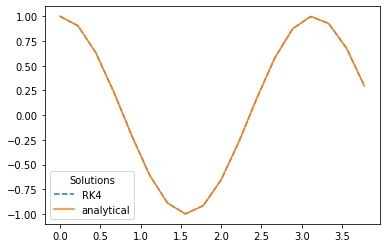

In [ ]:
# y' = z
# z' = -4y

a = 0.0
b = 4.0
N = 10
 
while True:
  h = (b-a)/N
  t_data = np.arange(a,b,h)
  RK4_y_data = []
  RK4_z_data = []
  y_true = [math.cos(2*i) for i in t_data]
  y = 1.0
  z = 0.0

  for x in t_data:
    RK4_y_data.append(y)
    RK4_z_data.append(z)

    p1 = h*z
    k1 = h*f(y)  #(x, v, t)

    p2 = h*(z + 0.5*k1)
    k2 = h*f(y+0.5*p1)

    p3 = h*(z + 0.5*k2)
    k3 = h*f(y+0.5*p2)

    p4 = h*(z + k3)
    k4 = h*f(y+p3)

    y += (p1 + 2*p2 + 2*p3 + p4)/6
    z += (k1 + 2*k2 + 2*k3 + k4)/6

  MSE = np.square(np.subtract(RK4_y_data,y_true)).mean() 
  RMSE = math.sqrt(MSE)

  if RMSE<0.001:
    print(f"Root Mean Square Error: {RMSE}")
    print(f"The stepsize (Δt) that yields the required accuracy:{h}")
    break
  else:
    N += 0.5
    
plt.plot(t_data, RK4_y_data, '--')
plt.plot(t_data, y_true, '-')
plt.legend(['RK4','analytical'],title = 'Solutions', loc='best')
plt.show()

The stepsize (Δt) that yields the required accuracy:0.2222222222222222

(**d**) the 5th-order Runge-Kutta method (given by Eq. 25.41 in the book). Find the stepsize $\Delta t$ that yields the required accuracy.

Root Mean Square Error: 0.0002368795856086965
The stepsize (Δt) that yields the required accuracy:0.4


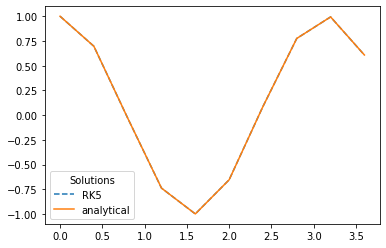

In [ ]:
# y' = z
# z' = -4y

a = 0.0
b = 4.0
N = 10

while True:
  h = (b-a)/N
  t_data = np.arange(a,b,h)
  RK5_y_data = []
  RK5_z_data = []
  y_true = [math.cos(2*i) for i in t_data]
  y = 1.0
  z = 0.0

  for x in t_data:
    RK5_y_data.append(y)
    RK5_z_data.append(z)

    p1 = h*z
    k1 = h*f(y)  #(x, v, t)

    p2 = h*(z + 0.25*k1)
    k2 = h*f(y+0.25*p1)

    p3 = h*(z + 0.125*k1 + 0.125*k2)
    k3 = h*f(y + 0.125*p1 + 0.125*p2)

    p4 = h*(z - 0.5*k2 + k3)
    k4 = h*f(y - 0.5*p2 + p3)

    p5 = h*(z + 0.1875*k1 + 0.5625*k4)
    k5 = h*f(y + 0.1875*p1 + 0.5625*p4)

    p6 = h*(z - (3/7)*k1 + (2/7)*k2 + (12/7)*k3 - (12/7)*k4 + (8/7)*k5)
    k6 = h*f(y - (3/7)*p1 + (2/7)*p2 + (12/7)*p3 - (12/7)*p4 + (8/7)*p5)

    y += (7*p1 + 32*p3 + 12*p4 + 32*p5 + 7*p6)/90
    z += (7*k1 + 32*k3 + 12*k4 + 32*k5 + 7*k6)/90

  MSE = np.square(np.subtract(RK5_y_data,y_true)).mean() 
  RMSE = math.sqrt(MSE)
 

  if RMSE<0.001:
    print(f"Root Mean Square Error: {RMSE}")
    print(f"The stepsize (Δt) that yields the required accuracy:{h}")
    break
  else:
    N += 0.5

plt.plot(t_data, RK5_y_data, '--')
plt.plot(t_data, y_true, '-')
plt.legend(['RK5','analytical'],title = 'Solutions', loc='best')
plt.show()

The stepsize (Δt) that yields the required accuracy:0.4

(**e**) Provide an easy-to-understand plots of all the solutions (including the exact analytical solution) in one frame using the $\tt matplotlib$ library.

**Comparison of the true solution with numerical solutions of RK methods**

In this task we take N as 10, where the stepsize equals 0.4 for a better vision of difference between methods.I have taken the data from the algorithms above, where the while loop was eliminated by writing a break without a possibility to iterate.

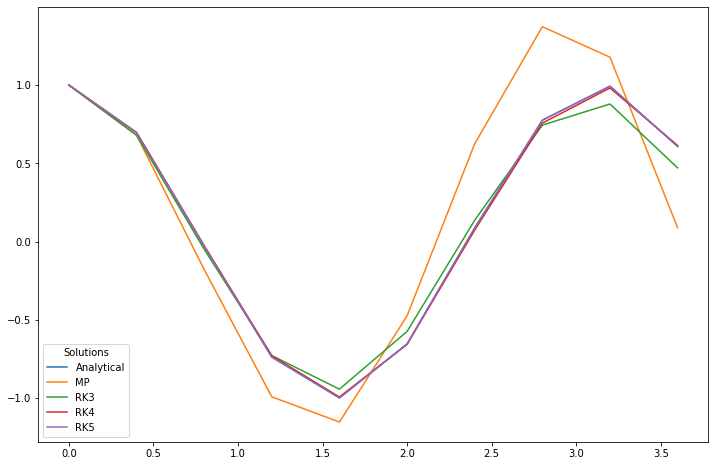

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(t_data, y_true, '-')
plt.plot(t_data, MP_y_data, '-')
plt.plot(t_data, RK3_y_data, '-')
plt.plot(t_data, RK4_y_data, '-')
plt.plot(t_data, RK5_y_data, '-')

plt.legend(['Analytical','MP','RK3','RK4','RK5'],title = 'Solutions', loc='best')
plt.show()


It is theoretically known that for the lower-order RK methods the value which represents the order of the method also stays for the power value of h(stepsize) in global truncation error $O(h^n)$.


*   MidPoint Method -> $O(h^2)$
*   RK3 Method -> $O(h^3)$
*   RK4 Method -> $O(h^4)$
*   RK5 Method -> $O(h^6)$ as there are 6 function evalutions


The graph above clearly shows that MidPoint method approximates the numerical solution with the more significant truncation error than others.Also it can be seen as the order of the method increases the better alignment of a RK method with analytical solution and the better accuracy.All these patterns of the RK method trends on the graph can be defined by the theoretical analysis($O(h^n)$) above.


(**f**) Asses which method yields the required accuracy with the lowest computational cost. 


I used the previous algorithms of methods to extract the data about errors for 10 stepsizes.I made "for" loop that have iterated through these stepsizes.The range of stepsizes was [0,1] for a 0.1 step.The error  and computational effort was evaluated at each step and then the graph of all 4 methods' performance was plotted.The computational effor was calculated by the formula below:

$$Computational-Effort = n_e(\frac{b-a}{h})$$


*   b = 4
*   a = 0
*   h = np.arange(1,0, 0.1)
*   $n_e$ = the number of function evaluations involved in the particular RK computation





In [ ]:
a = 0.0
b = 4.0
MP_n_e = 2 #number of evalutions for MP
RK3_n_e = 3 #number of evalutions for RK3
RK4_n_e = 4 #number of evalutions for RK4
RK5_n_e = 6 #number of evalutions for RK5
n_e = [MP_n_e, RK3_n_e, RK4_n_e, RK5_n_e]
MP_efforts = []
RK3_efforts = []
RK4_efforts = []
RK5_efforts = []
for h in np.arange(1,0,-0.1):
  for n in n_e:
    if n == MP_n_e:
      effort = (n*(b-a))/h
      MP_efforts.append(effort)
    elif n == RK3_n_e:
      effort = (n*(b-a))/h
      RK3_efforts.append(effort)
    elif n == RK4_n_e:
      effort = (n*(b-a))/h
      RK4_efforts.append(effort)
    else:
      effort = (n*(b-a))/h
      RK5_efforts.append(effort)



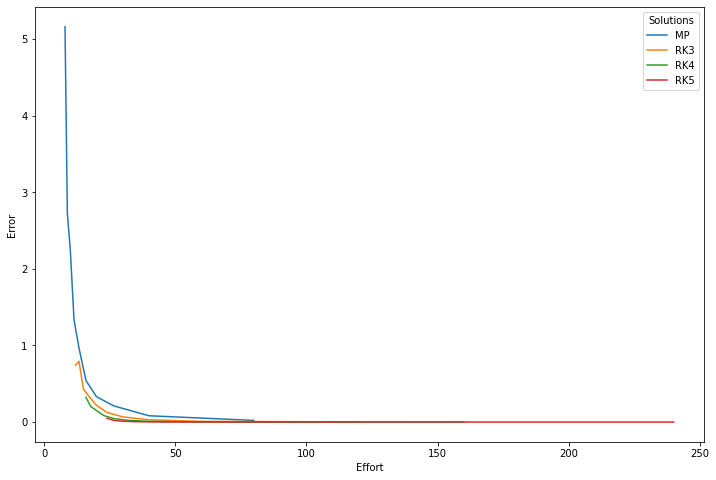

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(MP_efforts, MP_errors, '-')
plt.plot(RK3_efforts, RK3_errors, '-')
plt.plot(RK4_efforts, RK4_errors, '-')
plt.plot(RK5_efforts, RK5_errors, '-')
plt.xlabel('Effort')
plt.ylabel('Error')
plt.legend(['MP','RK3','RK4','RK5'],title = 'Solutions', loc='best')
plt.show()

Analyzing this graph of Error vs. Effort, it can be said that higher-order methods achieve better global truncation error or accuracy at the same computation effort.To conclude, RK5 method has the best performance in terms of attaining the best accuracy having the same computational effort with other RK methods. 

**Conclusion**

This research has given the performance results of each method at estimating the numerucal solution of the give ODE.We analyzed each method, and concluded that RK5 method yields the required accuracy with the lowest computational cost.This research is important for maximizing the efficiency in conducting the computational processes in any scientific field. Integrating the most productive method in terms of efficient memory usage and truncation error is the one of the main part of conducting data related research and should be done thoroughly.This research can be used by others to investigate the ODE problems. 